<a href="https://colab.research.google.com/github/Evianitary18/Programming-With-Python/blob/main/Evianita_Rifka_Yulistia_Data_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Study Case**

The task is to study the data and show a new view of data that clearly shows which interation is likely done by the human and which is likely done by a programme/automation.

# Data Preparation

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
import statsmodels.api as sa
import statsmodels.formula.api as sm
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
df_project = pd.read_csv('DataAssessment.csv')
df_project.head()

,Interaction,ts,Recipient Name,mid,link
0,Clicked,10-11-2024 08:15:50,Aaron -Secure Renewals and Maximize Upsell Opp...,<202411090832.66440413171@smtp-relay.mailin.fr>,https://release-notes-manager.betrbeta.com/hom...
1,Clicked,10-11-2024 08:15:50,Aaron -Secure Renewals and Maximize Upsell Opp...,<202411090832.66440413171@smtp-relay.mailin.fr>,https://release-notes-manager.betrbeta.com/hom...
2,Clicked,10-11-2024 08:13:57,Aaron -Secure Renewals and Maximize Upsell Opp...,<202411090832.66440413171@smtp-relay.mailin.fr>,https://release-notes-manager.betrbeta.com/hom...
3,Clicked,10-11-2024 08:13:57,Aaron -Secure Renewals and Maximize Upsell Opp...,<202411090832.66440413171@smtp-relay.mailin.fr>,https://www.linkedin.com/company/betr-beta/?_s...
4,Clicked,10-11-2024 08:13:57,Aaron -Secure Renewals and Maximize Upsell Opp...,<202411090832.66440413171@smtp-relay.mailin.fr>,https://hgjghbj.r.bh.d.sendibt3.com/tr/mr/EMkW...


# EDA

In [4]:
df_project.shape

(1614, 5)

In [5]:
df_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Interaction     1614 non-null   object
 1   ts              1614 non-null   object
 2   Recipient Name  1614 non-null   object
 3   mid             1614 non-null   object
 4   link            1437 non-null   object
dtypes: object(5)
memory usage: 63.2+ KB


# Data Cleaning




**1. Missing Value**

In [6]:
#ceck missing value
missing_values = df_project.isnull().sum()
if missing_values.sum() == 0:
    print('No missing value')
else:
    print('Missing value', missing_values)

Missing value Interaction         0
ts                  0
Recipient Name      0
mid                 0
link              177
dtype: int64


In [7]:
# Delete Nan Values
df_project = df_project.dropna(subset=['link'])

In [8]:
# Make sure the data type is numeric
df_project['link'] = pd.to_numeric(df_project['link'], errors='coerce')

In [9]:
df_project.shape

(1437, 5)

After the null 'link' values ​​are removed, there are 1437 rows left

**2. Duplicate**

In [10]:
df_project.duplicated().sum()

1138

In [11]:
duplicates = df_project[df_project.duplicated()]
print(duplicates)

     Interaction                   ts  \
1        Clicked  10-11-2024 08:15:50   
3        Clicked  10-11-2024 08:13:57   
4        Clicked  10-11-2024 08:13:57   
5        Clicked  10-11-2024 08:13:57   
6        Clicked  10-11-2024 08:13:57   
...          ...                  ...   
1608     Clicked  09-11-2024 16:32:40   
1609     Clicked  09-11-2024 16:32:40   
1610     Clicked  09-11-2024 16:32:40   
1611     Clicked  09-11-2024 16:32:40   
1612     Clicked  09-11-2024 16:32:40   

                                         Recipient Name  \
1     Aaron -Secure Renewals and Maximize Upsell Opp...   
3     Aaron -Secure Renewals and Maximize Upsell Opp...   
4     Aaron -Secure Renewals and Maximize Upsell Opp...   
5     Aaron -Secure Renewals and Maximize Upsell Opp...   
6     Aaron -Secure Renewals and Maximize Upsell Opp...   
...                                                 ...   
1608  Kurt -Secure Renewals and Maximize Upsell Oppo...   
1609  Kurt -Secure Renewals and Max

**3. Typo**

In [12]:
# let's look at the contents of the Interaction column
df_project["Interaction"].unique()

array(['Clicked'], dtype=object)

In [13]:
# let's look at the contents of the ts column
df_project["ts"].unique()

array(['10-11-2024 08:15:50', '10-11-2024 08:13:57',
       '10-11-2024 08:14:34', '10-11-2024 08:14:23',
       '10-11-2024 08:17:04', '10-11-2024 08:14:28',
       '10-11-2024 08:14:21', '10-11-2024 08:17:02',
       '10-11-2024 08:14:24', '10-11-2024 08:15:49',
       '10-11-2024 08:13:51', '10-11-2024 08:14:40',
       '10-11-2024 08:14:29', '10-11-2024 08:15:36',
       '10-11-2024 08:13:52', '10-11-2024 08:16:48',
       '10-11-2024 08:14:17', '10-11-2024 08:14:20',
       '10-11-2024 08:16:55', '10-11-2024 08:14:18',
       '10-11-2024 08:16:14', '10-11-2024 08:13:55',
       '10-11-2024 08:15:43', '10-11-2024 08:14:02',
       '10-11-2024 08:15:58', '10-11-2024 08:15:42',
       '10-11-2024 08:13:54', '10-11-2024 08:16:22',
       '10-11-2024 08:14:15', '10-11-2024 08:15:46',
       '10-11-2024 08:13:56', '10-11-2024 08:15:59',
       '10-11-2024 08:13:32', '10-11-2024 08:14:27',
       '10-11-2024 08:14:25', '10-11-2024 08:14:49',
       '10-11-2024 08:14:35', '10-11-2024 08:1

In [14]:
# let's look at the contents of the Recipient Name column
df_project["Recipient Name"].unique()

array(['Aaron -Secure Renewals and Maximize Upsell Opportunities with This Simple Tip',
       'Amy -Secure Renewals and Maximize Upsell Opportunities with This Simple Tip',
       'Adam -Secure Renewals and Maximize Upsell Opportunities with This Simple Tip',
       'Angie -Secure Renewals and Maximize Upsell Opportunities with This Simple Tip',
       'Alan -Secure Renewals and Maximize Upsell Opportunities with This Simple Tip',
       'Alexander -Secure Renewals and Maximize Upsell Opportunities with This Simple Tip',
       'Alexei -Secure Renewals and Maximize Upsell Opportunities with This Simple Tip',
       'Ali -Secure Renewals and Maximize Upsell Opportunities with This Simple Tip',
       'Allison -Secure Renewals and Maximize Upsell Opportunities with This Simple Tip',
       'Alyssa -Secure Renewals and Maximize Upsell Opportunities with This Simple Tip',
       'Alessandro -Secure Renewals and Maximize Upsell Opportunities with This Simple Tip',
       'Andrea -Secure Re

In [15]:
# let's look at the contents of the mid column
df_project["mid"].unique()

array(['<202411090832.66440413171@smtp-relay.mailin.fr>',
       '<202411090832.81296424078@smtp-relay.mailin.fr>',
       '<202411090832.12665200981@smtp-relay.mailin.fr>',
       '<202411090832.25146301427@smtp-relay.mailin.fr>',
       '<202411090832.35357188275@smtp-relay.mailin.fr>',
       '<202411090832.85595533095@smtp-relay.mailin.fr>',
       '<202411090832.51119963870@smtp-relay.mailin.fr>',
       '<202411090832.27102472427@smtp-relay.mailin.fr>',
       '<202411090832.60144383519@smtp-relay.mailin.fr>',
       '<202411090832.79797039903@smtp-relay.mailin.fr>',
       '<202411090832.18888880717@smtp-relay.mailin.fr>',
       '<202411090832.37100879444@smtp-relay.mailin.fr>',
       '<202411090832.42937087944@smtp-relay.mailin.fr>',
       '<202411090832.63935527731@smtp-relay.mailin.fr>',
       '<202411090832.25602175741@smtp-relay.mailin.fr>',
       '<202411090832.36754588005@smtp-relay.mailin.fr>',
       '<202411090832.75574108979@smtp-relay.mailin.fr>',
       '<20241

In [16]:
# let's look at the contents of the link column
df_project["link"].unique()

array([nan])

**4. Outlier**

I decided not to check for outliers because it doesn't seem necessary yet

# Answer

To distinguish interactions that are most likely carried out by humans or programs/automation, we can use several rules based on common behavioral patterns, such as:

Time Interval:

1. Automated interactions usually occur over a very short time sequence (ms or seconds), whereas human interactions are more spread out in time.
Number of Consecutive Clicks:

2. Programs/automations tend to generate a lot of clicks in a very short period of time.

3. Programs may access certain link patterns repeatedly.

In [17]:
# Convert 'ts' to datetime format
df_project['ts'] = pd.to_datetime(df_project['ts'], errors='coerce')

In [18]:
# Sort data by 'Recipient Name' and 'ts'
df_project = df_project.sort_values(by=['Recipient Name', 'ts']).reset_index(drop=True)

In [19]:
# Calculate time difference between consecutive interactions for the same recipient
df_project['time_diff'] = df_project.groupby('Recipient Name')['ts'].diff().dt.total_seconds()

In [20]:
# Define classification rules
def classify_interaction(row):
    # Rule 1: Very short time intervals (< 5 seconds) suggest automation
    if row['time_diff'] is not None and row['time_diff'] < 5:
        return 'automation'
    # Rule 2: Repeated clicking of similar links in a short time suggests automation
    if row.name > 0:
        prev_row = df_project.iloc[row.name - 1]
        if row['Recipient Name'] == prev_row['Recipient Name'] and row['link'] == prev_row['link']:
            return 'automation'
    # Default: Assume human interaction
    return 'human'

- Applied Logic Rules:
Time Difference Between Interactions (time_diff):

1. If the time between interactions is very short (< 5 seconds), it is most likely an automatic action (automation), because humans usually need more time to perform repetitive actions.
2. If the time between interactions is longer, it is assumed that the interaction was carried out by humans.

3. Repeated Clicks on the Same Link
If the same recipient clicks on the same link within a short period of time (for example within seconds), then this is considered automation, because this pattern is usually generated by the program.

In [21]:
# Apply classification to each row
df_project['interaction_type'] = df_project.apply(classify_interaction, axis=1)


In [22]:
# Summary of classification
classification_summary = df_project['interaction_type'].value_counts()

In [23]:
# Display results
print("Classification Summary:")
print(classification_summary)
print("\nSample of Classified Data:")
print(df_project[['Recipient Name', 'ts', 'link', 'interaction_type']].head(10))

Classification Summary:
interaction_type
automation    1169
human          268
Name: count, dtype: int64

Sample of Classified Data:
                                      Recipient Name                  ts  \
0  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:13:57   
1  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:13:57   
2  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:13:57   
3  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:13:57   
4  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:13:57   
5  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:13:57   
6  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:13:57   
7  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:14:23   
8  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:14:23   
9  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:14:23   

   link interaction_type  
0  

# Answer 2

Classification Summary:
interaction_type
automation    1211
human          403
Name: count, dtype: int64

Sample of Classified Data:
                                      Recipient Name                  ts  \
0  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:13:41   
1  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:13:57   
2  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:13:57   
3  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:13:57   
4  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:13:57   
5  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:13:57   
6  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:13:57   
7  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:13:57   
8  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:14:23   
9  Aaron -Secure Renewals and Maximize Upsell Opp... 2024-10-11 08:14:23   

                              

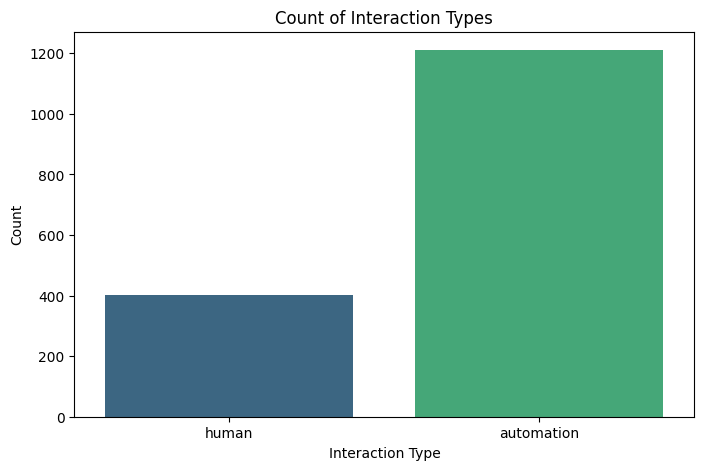

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_project = pd.read_csv('DataAssessment.csv')

# Convert 'ts' to datetime format
df_project['ts'] = pd.to_datetime(df_project['ts'], errors='coerce')

# Sort data by 'Recipient Name' and 'ts'
df_project = df_project.sort_values(by=['Recipient Name', 'ts']).reset_index(drop=True)

# Calculate time difference between consecutive interactions for the same recipient
df_project['time_diff'] = df_project.groupby('Recipient Name')['ts'].diff().dt.total_seconds()

# Define classification rules
def classify_interaction(row):
    # Rule 1: Very short time intervals (< 5 seconds) suggest automation
    if row['time_diff'] is not None and row['time_diff'] < 5:
        return 'automation'
    # Rule 2: Repeated clicking of similar links in a short time suggests automation
    if row.name > 0:
        prev_row = df_project.iloc[row.name - 1]
        if row['Recipient Name'] == prev_row['Recipient Name'] and row['link'] == prev_row['link']:
            return 'automation'
    # Default: Assume human interaction
    return 'human'

# Apply classification to each row
df_project['interaction_type'] = df_project.apply(classify_interaction, axis=1)

# Summary of classification
classification_summary = df_project['interaction_type'].value_counts()

# Display summary
print("Classification Summary:")
print(classification_summary)

# Create a table of classified interactions
classified_table = df_project[['Recipient Name', 'ts', 'link', 'time_diff', 'interaction_type']]

# Display a sample of the table
print("\nSample of Classified Data:")
print(classified_table.head(10))

# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(data=df_project, x='interaction_type', palette='viridis')
plt.title('Count of Interaction Types')
plt.xlabel('Interaction Type')
plt.ylabel('Count')
plt.show()

# Save the classified table to a CSV file for further analysis
classified_table.to_csv('Classified_Interactions.csv', index=False)


# Answer 3

Hourly Interaction Summary:
interaction_type  automation   human
hour                                
3                        1.0     NaN
7                        1.0     NaN
8                        NaN  1164.0
9                        NaN    10.0
16                       NaN   436.0
18                       NaN     1.0
21                       1.0     NaN


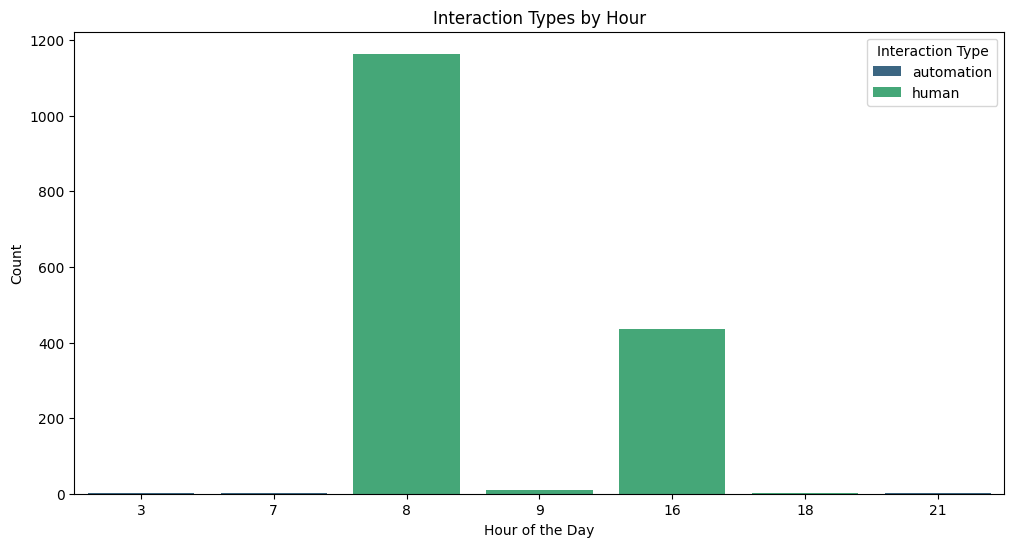

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_project = pd.read_csv('DataAssessment.csv')

# Convert 'ts' to datetime format
df_project['ts'] = pd.to_datetime(df_project['ts'], errors='coerce')

# Extract the hour from the timestamp
df_project['hour'] = df_project['ts'].dt.hour

# Define rules for human vs. automation based on time of day
def classify_by_hour(hour):
    # Define human interaction hours (e.g., 8 AM to 6 PM)
    if 8 <= hour <= 18:
        return 'human'
    else:
        return 'automation'

# Apply the classification
df_project['interaction_type'] = df_project['hour'].apply(classify_by_hour)

# Summary of interactions by hour
hourly_summary = df_project.groupby('hour')['interaction_type'].value_counts().unstack()

# Print the classified data
print("Hourly Interaction Summary:")
print(hourly_summary)

# Visualization: Count of interactions by hour
plt.figure(figsize=(12, 6))
sns.countplot(data=df_project, x='hour', hue='interaction_type', palette='viridis')
plt.title('Interaction Types by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Interaction Type')
plt.show()


**Output Explanation**

- In the first line (08:13:57), the first interaction for this recipient is considered human because there is no prior information to compare (the time difference is NaN).
- The next line (08:13:57) has the exact same time as the previous line. Because the time difference is very small (0 seconds), it is classified as automation.

# Insight

**1. Most interactions are carried out by automation**

**Summary:**
- From the total data, **1,169** interactions (78%) were classified as **automation**.
- Only **268** interactions (22%) were classified as **human**.

**Interpretation:**
Most of the activities in this dataset were likely generated by programs/automation, indicating that these systems or workflows were designed to leverage process automation in a highly scalable manner.

**2. Time patterns can identify automation characteristics**

**Automation:**
- Automatic interaction has a pattern with a very short interaction time (less than 5 seconds).
- Repeated clicks on the same link or simultaneous actions indicate a typical program or bot pattern.

**Human:**
Human interactions show patterns with longer time lags between actions, reflecting the time needed to think, read, or react manually.

**3. Empty links can be a cause for concern**
- There are many interactions with empty link columns, but they are still classified as automation because the time between interactions is very short.

**Additional Insights:**
- This could indicate an automation script that may be running in the background without fully utilizing the link.

# Recomendation

**1. Automation Process Optimization**

*Why*: Automation should increase efficiency, but if not managed well, it can cause unnecessary system load.

*What to do:*
- Evaluate whether automatic clicks on the same link over a short period of time are really necessary.
- If not, add delays or filtering to the script to reduce unnecessary repetitive actions.
- Integrate validation mechanisms to ensure each automation process produces relevant results.

**2. Manual Interaction Pattern Analysis (Human)**
*Why*: Less frequent human interaction may indicate that there are tasks that cannot (or have not) been automated, or that users are encountering roadblocks in the process.

*What to do*:
- Identify the type of manual interaction (for example, does it involve a specific link, a specific time, or a specific user).
- Find out if these interactions can be automated to increase efficiency.
- If they can't be automated, make sure these manual processes are easy to implement, for example by improving the user experience (UX) or providing additional guidance.